In [34]:
#importing reqired packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler 
#from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression

import xgboost as xgb
#from sklearn import datasets
from xgboost import XGBRegressor



In [62]:
#Loading input file
train = pd.read_csv("train_F3fUq2S.csv")
test = pd.read_csv("test_Bk2wfZ3.csv")

In [8]:
#looking shape of the DataFrame
train.shape,test.shape

((1888, 22), (762, 21))

In [9]:
#describing the train data
train.describe()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,category,product,no_of_CTA,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
count,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,...,1888.000000,1888.000000,1888.000000,1888.0,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000,1888.000000
mean,944.500000,4.395657,86.246292,14185.780191,35.239407,2.828390,0.199682,9.949682,17.525424,4.222458,...,0.909958,0.056674,0.834216,0.0,0.210805,0.039725,40.197034,0.112288,11.634534,0.041888
std,545.162973,3.277927,30.143206,7327.615307,28.139498,1.763193,0.399867,5.300719,12.369526,4.628348,...,0.866467,0.231279,1.033901,0.0,0.613442,0.195363,553.957470,0.315804,2.949121,0.084223
min,1.000000,0.000000,9.000000,23.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,472.750000,3.000000,69.000000,9554.500000,21.000000,1.000000,0.000000,6.000000,9.000000,2.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.005413
50%,944.500000,3.000000,83.000000,12689.000000,29.000000,3.000000,0.000000,10.000000,12.000000,3.000000,...,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.010686
75%,1416.250000,3.000000,98.000000,17351.500000,40.000000,4.000000,0.000000,15.000000,27.250000,5.000000,...,2.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,12.000000,0.035589
max,1888.000000,15.000000,265.000000,44491.000000,286.000000,6.000000,1.000000,15.000000,43.000000,49.000000,...,6.000000,1.000000,6.000000,0.0,6.000000,1.000000,14999.000000,1.000000,16.000000,0.897959


In [11]:
#ratio of null values in train
train.isnull().sum()/train.shape[0] *100

campaign_id           0.0
sender                0.0
subject_len           0.0
body_len              0.0
mean_paragraph_len    0.0
day_of_week           0.0
is_weekend            0.0
times_of_day          0.0
category              0.0
product               0.0
no_of_CTA             0.0
mean_CTA_len          0.0
is_image              0.0
is_personalised       0.0
is_quote              0.0
is_timer              0.0
is_emoticons          0.0
is_discount           0.0
is_price              0.0
is_urgency            0.0
target_audience       0.0
click_rate            0.0
dtype: float64

In [13]:
#ratio of null values in test
test.isnull().sum()/test.shape[0] *100

campaign_id           0.0
sender                0.0
subject_len           0.0
body_len              0.0
mean_paragraph_len    0.0
day_of_week           0.0
is_weekend            0.0
times_of_day          0.0
category              0.0
product               0.0
no_of_CTA             0.0
mean_CTA_len          0.0
is_image              0.0
is_personalised       0.0
is_quote              0.0
is_timer              0.0
is_emoticons          0.0
is_discount           0.0
is_price              0.0
is_urgency            0.0
target_audience       0.0
dtype: float64

In [14]:
#finding categorical features
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#finding numerical features
numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 1
Numerical Features in Train Set: 21


In [15]:
#finding categorical features
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

#finding numerical features
numerical= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 1
Numerical Features in Test Set: 20


There is no missing values so we dont need Data cleaning

In [16]:
#Exploratory Data Analysis
train.columns

Index(['campaign_id', 'sender', 'subject_len', 'body_len',
       'mean_paragraph_len', 'day_of_week', 'is_weekend', 'times_of_day',
       'category', 'product', 'no_of_CTA', 'mean_CTA_len', 'is_image',
       'is_personalised', 'is_quote', 'is_timer', 'is_emoticons',
       'is_discount', 'is_price', 'is_urgency', 'target_audience',
       'click_rate'],
      dtype='object')

In [17]:
train['times_of_day'].value_counts()

Evening    1317
Noon        447
Morning     124
Name: times_of_day, dtype: int64

<AxesSubplot:xlabel='times_of_day', ylabel='count'>

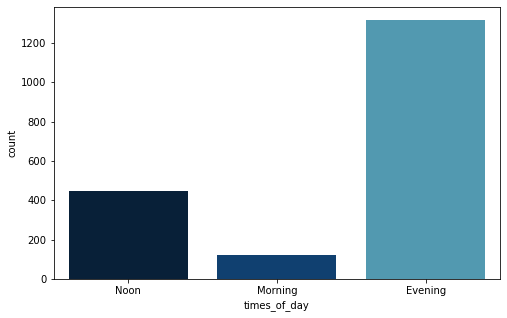

In [18]:
plt.figure(figsize=(8,5))
sns.countplot('times_of_day',data=train,palette='ocean')

In [24]:
train.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


In [64]:
# Labelencoding (converting catogorical values into numerical)
le = LabelEncoder()
var_mod = train.select_dtypes(include='object').columns
for i in var_mod:
    train[i] = le.fit_transform(train[i])
    
for i in var_mod:
    test[i] = le.fit_transform(test[i])

In [26]:
train.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,2,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,1,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,2,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,0,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,2,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


In [27]:
#seperarion of independent and dependent features
X=train.drop(columns = ['click_rate'],axis=1)
y=train['click_rate']

In [29]:
# as the datapoints differ a lot in magnitude, we'll scale them
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [30]:
# 20% data as validation set
X_train,X_valid,y_train,y_valid = train_test_split(X_scaled,y,test_size=0.3,random_state=225)

In [32]:
#Cheking muticolinerarity using VIF score
variables = X_train

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns
vif

,VIF,Features
0,1.566758,campaign_id
1,1.377729,sender
2,1.443893,subject_len
3,2.493858,body_len
4,1.528752,mean_paragraph_len
5,2.086391,day_of_week
6,2.125579,is_weekend
7,1.098318,times_of_day
8,1.276872,category
9,1.129338,product


In [49]:
#Dropping Unwanted feature
X=X.drop(columns = ['is_timer'],axis=1)

In [35]:
model = XGBRegressor()
model.fit(X_train,y_train)

[23:21:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [40]:
y_predict=model.predict(X_valid)

In [43]:
model.score(X_train,y_train)

0.7242340800992078

In [69]:
submission = pd.read_csv('Final_submission_Jeeva.csv')
final_predictions = model.predict(test.values)
submission['click_rate'] = final_predictions
submission.to_csv('my_submissionNew.csv', index=False)